## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### 2. Load the dataset and display a sample of five rows of the data frame.

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv',encoding='unicode_escape')
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [4]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    temp=df.copy(deep=True)
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(df.info())
    
basic_info(df)

Shape of the dataset (319795, 18)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Ast

### 4. Check the statistical summary of the dataset and write your inferences.

In [6]:
# Get the statistical summary of the dataset
summary = df.describe()

# Print the statistical summary
print(summary)

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [9]:
def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

# Drop duplicate rows
df_deduplicated = df.drop_duplicates()

# Check the shape of the DataFrame after dropping duplicates
shape_after_deduplication = df_deduplicated.shape
print(f"Shape of DataFrame after dropping duplicates: {shape_after_deduplication}")


Number of duplicate rows: 18078
Shape of DataFrame after dropping duplicates: (301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

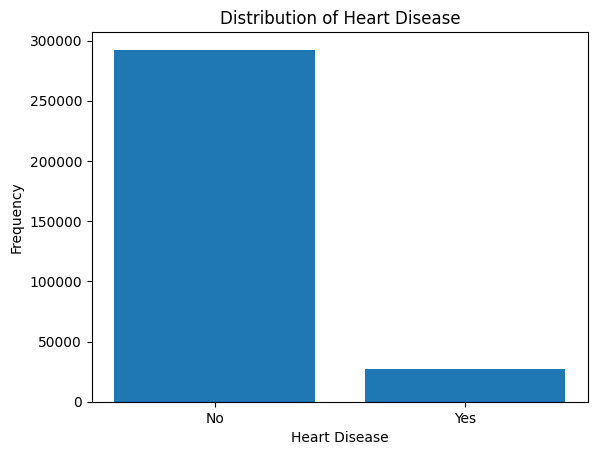

In [13]:
# Check the distribution of the target variable
target_distribution = df['HeartDisease'].value_counts()

# Create a bar plot
plt.bar(target_distribution.index, target_distribution.values)
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Disease')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

<Figure size 800x600 with 0 Axes>

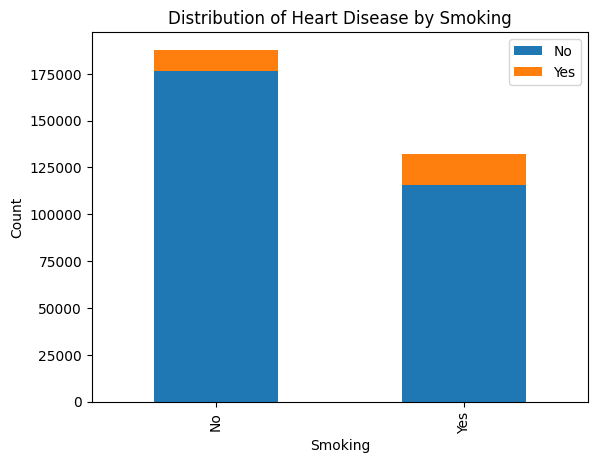

<Figure size 800x600 with 0 Axes>

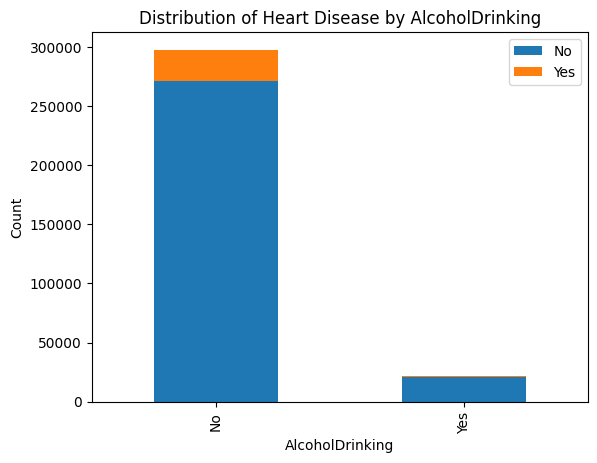

<Figure size 800x600 with 0 Axes>

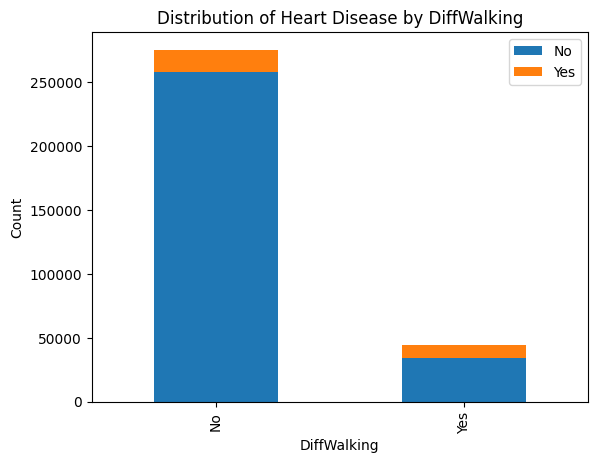

In [14]:
# Define a list of categorical features to analyze
categorical_features = ['Smoking', 'AlcoholDrinking', 'DiffWalking']

# Iterate over the categorical features and create bar plots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    grouped_data = df.groupby([feature, 'HeartDisease']).size().unstack()
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of Heart Disease by {feature}')
    plt.legend(loc='upper right')
    plt.show()

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [16]:
# Check the unique categories in the 'Diabetic' column
unique_categories = df['Diabetic'].unique()
print("Unique categories in 'Diabetic' column:")
print(unique_categories)

# Replace specific categories with new values
df['Diabetic'] = df['Diabetic'].replace('Yes (during pregnancy)', 'Yes')
df['Diabetic'] = df['Diabetic'].replace('No, borderline diabetes', 'No')

# Verify the updated 'Diabetic' column
updated_categories = df['Diabetic'].unique()
print("Updated unique categories in 'Diabetic' column:")
print(updated_categories)

Unique categories in 'Diabetic' column:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Updated unique categories in 'Diabetic' column:
['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [18]:
# Replace values in the 'HeartDisease' column
df['HeartDisease'] = df['HeartDisease'].replace({'No': 0, 'Yes': 1})

# Verify the updated 'HeartDisease' column
updated_values = df['HeartDisease'].unique()
print("Updated values in 'HeartDisease' column:")
print(updated_values)
print(df)

Updated values in 'HeartDisease' column:
[0 1]
        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                  0  16.60     Yes              No     No             3.0   
1                  0  20.34      No              No    Yes             0.0   
2                  0  26.58     Yes              No     No            20.0   
3                  0  24.21      No              No     No             0.0   
4                  0  23.71      No              No     No            28.0   
...              ...    ...     ...             ...    ...             ...   
319790             1  27.41     Yes              No     No             7.0   
319791             0  29.84     Yes              No     No             0.0   
319792             0  24.24      No              No     No             0.0   
319793             0  32.81      No              No     No             0.0   
319794             0  46.56      No              No     No             0.0   

        MentalHe

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [24]:
# Create a list of columns to label encode
columns_to_label_encode = ["AgeCategory", "Race", "GenHealth"]

# Create a list of columns to dummy encode
columns_to_dummy_encode = [col for col in df.columns if col not in columns_to_label_encode]

# Label encode columns
label_encoder = LabelEncoder()
for col in columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Dummy encode columns
df = pd.get_dummies(df, columns=columns_to_dummy_encode)

# View the updated DataFrame
print(df.head())

   AgeCategory  Race  GenHealth  HeartDisease_0  HeartDisease_1  BMI_12.02  \
0            7     5          4            True           False      False   
1           12     5          4            True           False      False   
2            9     5          1            True           False      False   
3           11     5          2            True           False      False   
4            4     5          4            True           False      False   

   BMI_12.08  BMI_12.13  BMI_12.16  BMI_12.2  ...  SleepTime_21.0  \
0      False      False      False     False  ...           False   
1      False      False      False     False  ...           False   
2      False      False      False     False  ...           False   
3      False      False      False     False  ...           False   
4      False      False      False     False  ...           False   

   SleepTime_22.0  SleepTime_23.0  SleepTime_24.0  Asthma_No  Asthma_Yes  \
0           False           False       

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [26]:
df = pd.read_csv('heart_2020_cleaned.csv',encoding='unicode_escape')
# Replace values in the 'HeartDisease' column
df['HeartDisease'] = df['HeartDisease'].replace({'No': 0, 'Yes': 1})

# Verify the updated 'HeartDisease' column
updated_values = df['HeartDisease'].unique()
print("Updated values in 'HeartDisease' column:")
print(updated_values)

Updated values in 'HeartDisease' column:
[0 1]


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [29]:
# Store the target column in the y variable
y = df['HeartDisease']

# Store the rest of the columns in the X variable
X = df.drop(columns=['HeartDisease'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the train and test data
print("Train data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Train data shape: (223856, 17) (223856,)
Test data shape: (95939, 17) (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [32]:
# Store the target column in the y variable
y = df['HeartDisease']

# Store the rest of the columns in the X variable
X = df.drop(columns=['HeartDisease'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical columns in train and test data
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Verify the standardized train and test data
print("Standardized Train Data:")
print(X_train.head())
print("\nStandardized Test Data:")
print(X_test.head())

Standardized Train Data:
             BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
303145 -1.229576      No              No     No        0.080386     -0.490018   
61634   0.391450      No              No     No       -0.423721     -0.490018   
117690  0.877286      No              No     No       -0.423721     -0.490018   
132104 -1.059769     Yes              No     No       -0.423721     -0.490018   
262165 -0.405699      No              No     No       -0.423721     -0.490018   

       DiffWalking     Sex  AgeCategory   Race Diabetic PhysicalActivity  \
303145          No  Female        45-49  White       No              Yes   
61634           No  Female        70-74  Other      Yes              Yes   
117690          No    Male        50-54  White      Yes              Yes   
132104          No    Male  80 or older  White       No              Yes   
262165          No  Female        75-79  White       No              Yes   

        GenHealth  SleepTime As

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [38]:
def train_fit_predict(model, X, y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the model with the train data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [39]:
# Store the target column in the y variable
y = df['HeartDisease']

# Store the rest of the columns in the X variable
X = df.drop(columns=['HeartDisease'])

# Create an instance of the model you want to use
model = LogisticRegression()

# Call the train_fit_predict function with the model and data
accuracy = train_fit_predict(model, X, y)

# Print the accuracy score
print("Accuracy score:", accuracy)

ValueError: could not convert string to float: 'No'

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [40]:
# Store the target column in the y variable
y = df['HeartDisease']

# Store the rest of the columns in the X variable
X = df.drop(columns=['HeartDisease'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of classifiers to evaluate
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# Train and evaluate each classifier
for classifier in classifiers:
    # Train and make predictions
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for each classifier
    print(f"{classifier.__class__.__name__} Accuracy: {accuracy}")

ValueError: could not convert string to float: 'No'

### Conclusion

----
## Happy Learning:)
----